[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


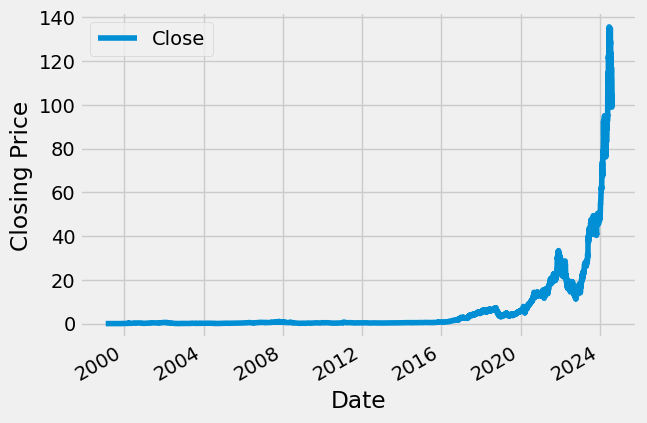

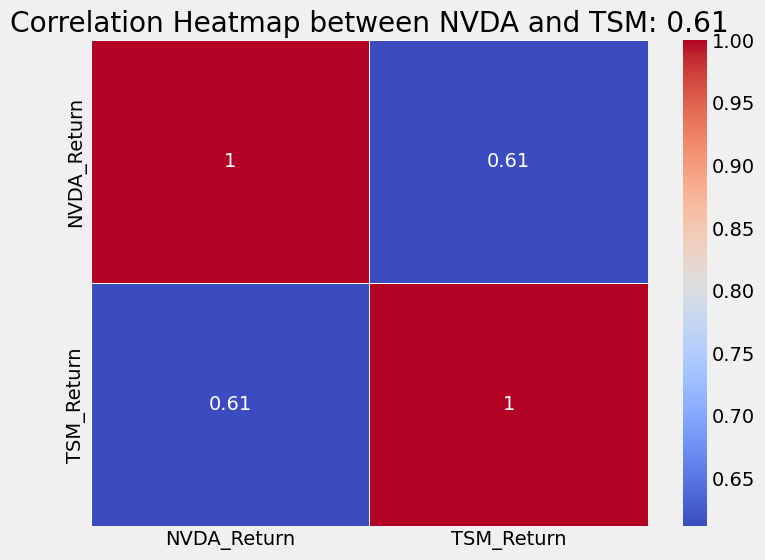

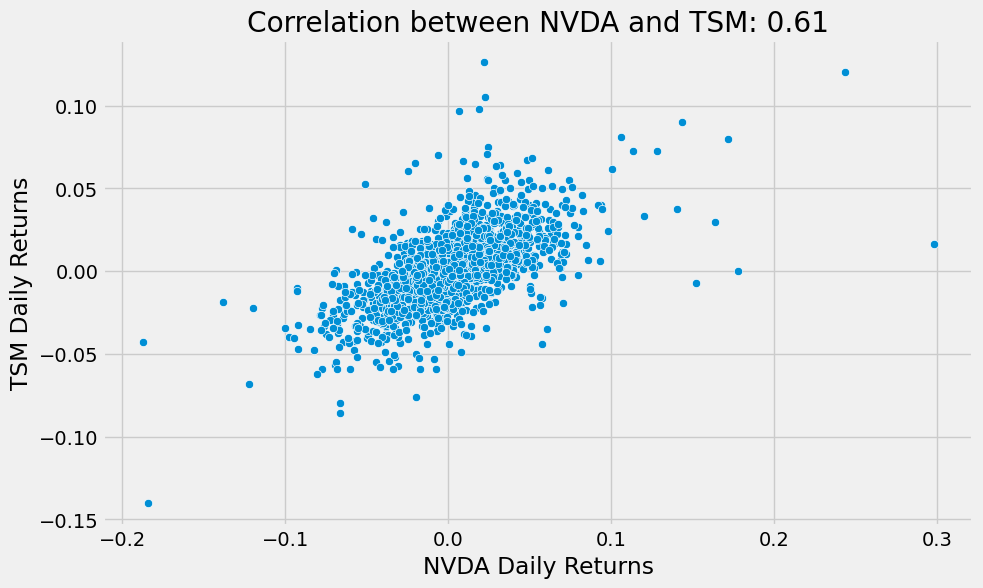

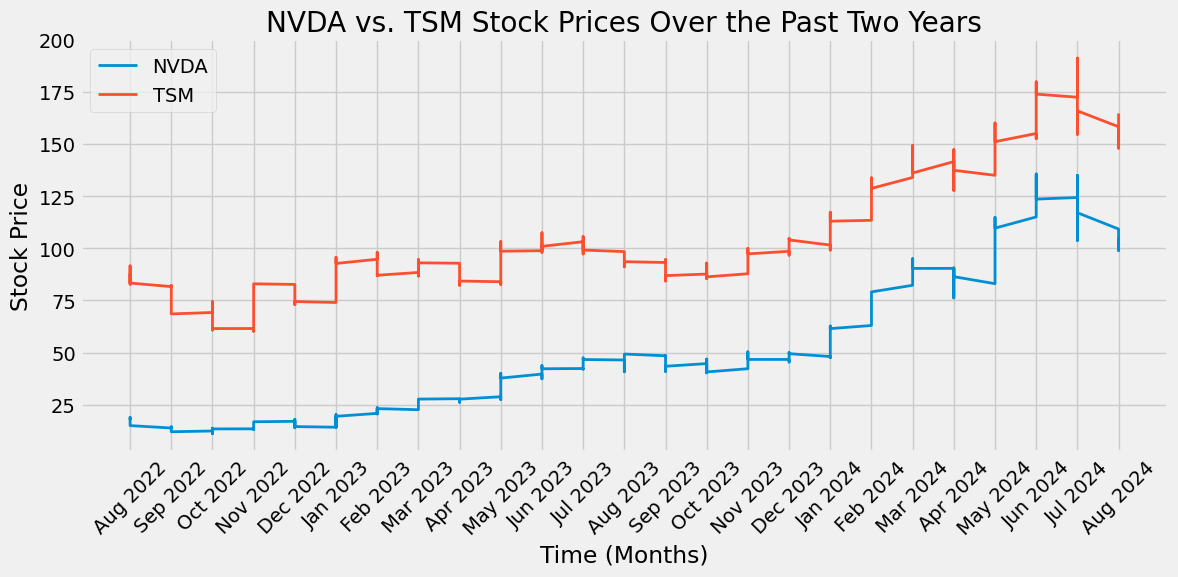

[array([1.32456938e-03, 1.42090180e-03, 1.16895586e-03, 9.37387755e-04,
       8.16972236e-04, 8.26234730e-04, 9.18861882e-04, 7.48428187e-04,
       6.39128015e-04, 3.50130769e-04, 3.90886893e-04, 4.18674817e-04,
       4.77956372e-04, 5.98371891e-04, 5.92814217e-04, 6.44685246e-04,
       5.81698871e-04, 5.24270169e-04, 7.53985419e-04, 7.55838271e-04,
       5.26122579e-04, 5.52058094e-04, 5.53910946e-04, 2.24157576e-04,
       0.00000000e+00, 5.00186182e-05, 3.89032715e-05, 1.48201677e-05,
       9.44795630e-05, 3.27900076e-04, 4.52020857e-04, 8.92926368e-04,
       9.67028090e-04, 1.16710300e-03, 1.18192361e-03, 1.22267930e-03,
       1.23564705e-03, 1.19674378e-03, 1.13746223e-03, 1.39496629e-03,
       1.43016429e-03, 1.37644085e-03, 1.35791542e-03, 1.31901171e-03,
       1.20971154e-03, 1.20600672e-03, 1.19674378e-03, 1.29678102e-03,
       1.31160163e-03, 1.28196085e-03, 1.45980507e-03, 1.40793404e-03,
       1.59133594e-03, 1.60986137e-03, 1.59874602e-03, 1.70619378e-03,
     

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

1672/1672 ━━━━━━━━━━━━━━━━━━━━ 54s 30ms/step - loss: 3.1176e-04
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


<ipython-input-4-96c5e6aac389>:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


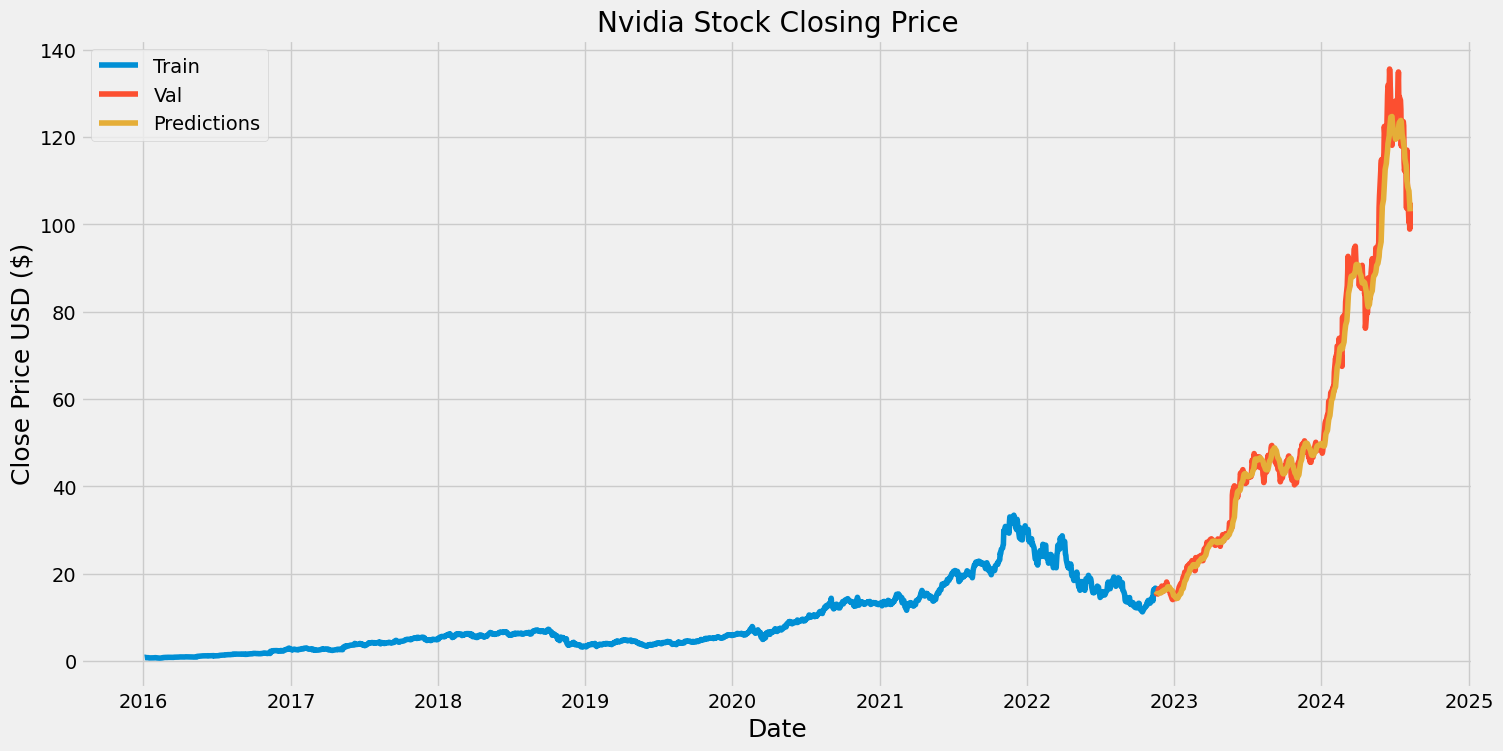

[*********************100%%**********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
The predicted price of tomorrow's closing price is $102.1


,Close
Date,
2024-08-02,107.269997
2024-08-05,100.449997
2024-08-06,104.250000
2024-08-07,98.910004
2024-08-08,104.970001


In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
from scipy import stats
import seaborn as sn
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from datetime import date
import statsmodels.api as sm

import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

nvda_prices = yf.download('NVDA', period='max')
nvda_prices.head()

#Visualize Nvidia's closing price over time
nvda_prices.index = pd.to_datetime(nvda_prices.index)
nvda_prices.plot.line(y="Close",ylabel="Closing Price",use_index=True)


today = date.today().strftime("%Y-%m-%d")
start_date = "2016-01-01"
nvda = yf.download('NVDA', start_date, today)
nvda.reset_index(inplace = True)

pd.set_option('display.max_rows',None)
#Key summary statistics
nvda.describe()


tsm = yf.download('TSM', start_date, today)
tsm.reset_index(inplace = True)

pd.set_option('display.max_rows',None)
tsm.head()

#To compare the two stocks over time, we'll join the data into one data frame and visualize it.
joined_price = pd.merge(nvda, tsm, on='Date', suffixes=('_nvda', '_tsm'))

joined_price.rename(columns={
    'Open_nvda': 'NVDA_Open', 'High_nvda': 'NVDA_High', 'Low_nvda': 'NVDA_Low', 'Close_nvda': 'NVDA_Close', 'Volume_nvda': 'NVDA_Volume',
    'Open_tsm': 'TSM_Open', 'High_tsm': 'TSM_High', 'Low_tsm': 'TSM_Low', 'Close_tsm': 'TSM_Close', 'Volume_tsm': 'TSM_Volume'
}, inplace=True)

joined_price.dropna(inplace=True)

#Create new features of returns for each stock, showing their percent change in closing price
joined_price['NVDA_Return'] = joined_price['NVDA_Close'].pct_change()
joined_price['TSM_Return'] = joined_price['TSM_Close'].pct_change()

joined_price.dropna(inplace=True)

#Explore correlation between returns of each stock
correlation_coefficient = np.corrcoef(joined_price['NVDA_Return'], joined_price['TSM_Return'])[0, 1]
correlation_matrix = joined_price[['NVDA_Return', 'TSM_Return']].corr()

plt.figure(figsize=(8, 6))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(f'Correlation Heatmap between NVDA and TSM: {correlation_coefficient:.2f}')
plt.show()

correlation_coefficient = np.corrcoef(joined_price['NVDA_Return'], joined_price['TSM_Return'])[0, 1]

plt.figure(figsize=(10, 6))
sn.scatterplot(data=joined_price, x='NVDA_Return', y='TSM_Return')
plt.title(f'Correlation between NVDA and TSM: {correlation_coefficient:.2f}')
plt.xlabel('NVDA Daily Returns')
plt.ylabel('TSM Daily Returns')
plt.grid(True)
plt.show()

# Reset the index to make 'Date' a regular column
joined_price.reset_index(inplace=True)

# Filter data for the past two years
two_years_ago = joined_price['Date'].max() - pd.DateOffset(years=2)
filtered_data = joined_price[joined_price['Date'] >= two_years_ago].copy()

# Create a 'Time' variable (in months) since the start date
filtered_data['Time'] = filtered_data['Date'].dt.strftime('%b %Y')

# Create a plot comparing the closing prices over time (in months)
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['Time'], filtered_data['NVDA_Close'], label='NVDA', linewidth=2)
plt.plot(filtered_data['Time'], filtered_data['TSM_Close'], label='TSM', linewidth=2)
plt.xlabel('Time (Months)')
plt.ylabel('Stock Price')
plt.title('NVDA vs. TSM Stock Prices Over the Past Two Years')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


nvda_prices = nvda_prices.loc["2016-01-01":].copy() #Isolate data from 2016 onwards to account for market shifts
nvda_prices.dropna(inplace=True)
nvda_prices.head()

close_data = nvda_prices.filter(['Close'])
dataset = close_data.values
training_data_len = math.ceil(len(dataset) *0.8) #1548 rows to train model on
training_data_len

#Scale the data to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_prices = scaler.fit_transform(dataset)

scaled_prices

#Create training data set and scaled training data set
train_data = scaled_prices[0:training_data_len, :]

x_train =[]
y_train =[]
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0]) #Append past 60 data values
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

#Convert x_train to y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
#Reshape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

#Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()


#compile model
model.compile(optimizer='adam', loss='mean_squared_error') #Loss sees how model performs, optimizer uses the loss to make improvements
model.fit(x_train, y_train, batch_size=1, epochs=1)


#Create testing data set
test_data = scaled_prices[training_data_len-60: , :]
#Create data sets for x and y test
x_test = []
y_test = dataset[training_data_len :, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


#Convert data to numpy array
x_test = np.array(x_test)
x_test.shape
#Reshape to 3d for LSTM model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1) )

#Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


#Get root mean squared error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2 )
rmse
#A RMSE of 25 indicates a decent performing model


#Plot performance and predictions
train = close_data[:training_data_len]
valid = close_data[training_data_len:]
valid['Predictions'] = predictions
#Visualize
plt.figure(figsize=(16,8))
plt.title('Nvidia Stock Closing Price')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(valid['Predictions'])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()

#Show valid and predicted prices
valid.tail()

nvda2 = yf.download('NVDA',start_date,today)
nvda2 = nvda2.filter(['Close'])
#Get last 60 days of closing price values
prev_60 = nvda2[-60:].values
prev_60_scaled = scaler.transform(prev_60) # Scale

X_test = []
X_test.append(prev_60_scaled)

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1) )
predicted_price = model.predict(X_test) #Get predicted scaled price
#undo scaling
predicted_price = scaler.inverse_transform(predicted_price)
print("The predicted price of tomorrow's closing price is $"+str(round(predicted_price[0][0], 2)))

nvda2.tail()


